In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tqdm import tqdm
from matplotlib.animation import FuncAnimation

In [2]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transformation and load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [3]:
# Define the model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 output classes for MNIST digits

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
    
    def predict(self, x):
        logits = self.forward(x)
        return torch.argmax(logits, dim=1)

In [4]:
# we will now define 20 different models, each with different random initializations
models = [Net().to(device) for i in range(20)]

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizers = [optim.Adam(model.parameters(), lr=0.001) for model in models]

# prepare the data loaders
# Get indices of training samples based on the label



In [5]:
# Prepare the data loaders
def prepare_loaders():
    # Get indices of training samples based on the label
    train_indices_0 = [i for i, label in enumerate(mnist_train.targets) if label == 0]
    train_indices_1 = [i for i, label in enumerate(mnist_train.targets) if label == 1]
    train_indices_2 = [i for i, label in enumerate(mnist_train.targets) if label == 2]
    train_indices_3 = [i for i, label in enumerate(mnist_train.targets) if label == 3]
    train_indices_4 = [i for i, label in enumerate(mnist_train.targets) if label == 4]
    train_indices_5 = [i for i, label in enumerate(mnist_train.targets) if label == 5]
    train_indices_6 = [i for i, label in enumerate(mnist_train.targets) if label == 6]
    train_indices_7 = [i for i, label in enumerate(mnist_train.targets) if label == 7]
    train_indices_8 = [i for i, label in enumerate(mnist_train.targets) if label == 8]
    train_indices_9 = [i for i, label in enumerate(mnist_train.targets) if label == 9]

    # Create Subsets
    subset_train_0 = Subset(mnist_train, train_indices_0)
    subset_train_1 = Subset(mnist_train, train_indices_1)
    subset_train_2 = Subset(mnist_train, train_indices_2)
    subset_train_3 = Subset(mnist_train, train_indices_3)
    subset_train_4 = Subset(mnist_train, train_indices_4)
    subset_train_5 = Subset(mnist_train, train_indices_5)
    subset_train_6 = Subset(mnist_train, train_indices_6)
    subset_train_7 = Subset(mnist_train, train_indices_7)
    subset_train_8 = Subset(mnist_train, train_indices_8)
    subset_train_9 = Subset(mnist_train, train_indices_9)

    # Create DataLoader for all subsets
    loader_0 = DataLoader(subset_train_0, batch_size=64, shuffle=True)
    loader_1 = DataLoader(subset_train_1, batch_size=64, shuffle=True)
    loader_2 = DataLoader(subset_train_2, batch_size=64, shuffle=True)
    loader_3 = DataLoader(subset_train_3, batch_size=64, shuffle=True)
    loader_4 = DataLoader(subset_train_4, batch_size=64, shuffle=True)
    loader_5 = DataLoader(subset_train_5, batch_size=64, shuffle=True)
    loader_6 = DataLoader(subset_train_6, batch_size=64, shuffle=True)
    loader_7 = DataLoader(subset_train_7, batch_size=64, shuffle=True)
    loader_8 = DataLoader(subset_train_8, batch_size=64, shuffle=True)
    loader_9 = DataLoader(subset_train_9, batch_size=64, shuffle=True)

    return loader_0, loader_1, loader_2, loader_3, loader_4, loader_5, loader_6, loader_7, loader_8, loader_9

In [6]:
loader_0, loader_1, loader_2, loader_3, loader_4, loader_5, loader_6, loader_7, loader_8, loader_9 = prepare_loaders()

In [7]:
# Function to train all of the models
# Each number will have two models trained on it

model_batch_accuracies = {0: [], 1: [], 2: [], 3: [], 4: [],
                            5: [], 6: [], 7: [], 8: [], 9: [],
                            10: [], 11: [], 12: [], 13: [], 14: [],
                            15: [], 16: [], 17: [], 18: [], 19: []}

def train_models():
    # Train the models
    for epoch in tqdm(range(5)):
        # Train model 0
        for batch_idx, (data, target) in enumerate(loader_0):
            data, target = data.to(device), target.to(device)
            optimizers[0].zero_grad()
            output = models[0](data)
            model_batch_accuracies[0].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[0].step()
        # Train model 1
        for batch_idx, (data, target) in enumerate(loader_1):
            data, target = data.to(device), target.to(device)
            optimizers[1].zero_grad()
            output = models[1](data)
            model_batch_accuracies[1].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[1].step()
        # Train model 2
        for batch_idx, (data, target) in enumerate(loader_2):
            data, target = data.to(device), target.to(device)
            optimizers[2].zero_grad()
            output = models[2](data)
            model_batch_accuracies[2].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[2].step()
        # Train model 3
        for batch_idx, (data, target) in enumerate(loader_3):
            data, target = data.to(device), target.to(device)
            optimizers[3].zero_grad()
            output = models[3](data)
            model_batch_accuracies[3].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[3].step()
        # Train model 4
        for batch_idx, (data, target) in enumerate(loader_4):
            data, target = data.to(device), target.to(device)
            optimizers[4].zero_grad()
            output = models[4](data)
            model_batch_accuracies[4].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[4].step()
        # Train model 5
        for batch_idx, (data, target) in enumerate(loader_5):
            data, target = data.to(device), target.to(device)
            optimizers[5].zero_grad()
            output = models[5](data)
            model_batch_accuracies[5].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[5].step()
        # Train model 6
        for batch_idx, (data, target) in enumerate(loader_6):
            data, target = data.to(device), target.to(device)
            optimizers[6].zero_grad()
            output = models[6](data)
            model_batch_accuracies[6].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[6].step()
        # Train model 7
        for batch_idx, (data, target) in enumerate(loader_7):
            data, target = data.to(device), target.to(device)
            optimizers[7].zero_grad()
            output = models[7](data)
            model_batch_accuracies[7].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[7].step()
        # Train model 8
        for batch_idx, (data, target) in enumerate(loader_8):
            data, target = data.to(device), target.to(device)
            optimizers[8].zero_grad()
            output = models[8](data)
            model_batch_accuracies[8].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[8].step()
        # Train model 9
        for batch_idx, (data, target) in enumerate(loader_9):
            data, target = data.to(device), target.to(device)
            optimizers[9].zero_grad()
            output = models[9](data)
            model_batch_accuracies[9].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[9].step()
        # Train model 10
        for batch_idx, (data, target) in enumerate(loader_0):
            data, target = data.to(device), target.to(device)
            optimizers[10].zero_grad()
            output = models[10](data)
            model_batch_accuracies[10].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[10].step()
        # Train model 11
        for batch_idx, (data, target) in enumerate(loader_1):
            data, target = data.to(device), target.to(device)
            optimizers[11].zero_grad()
            output = models[11](data)
            model_batch_accuracies[11].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[11].step()
        # Train model 12
        for batch_idx, (data, target) in enumerate(loader_2):
            data, target = data.to(device), target.to(device)
            optimizers[12].zero_grad()
            output = models[12](data)
            model_batch_accuracies[12].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[12].step()
        # Train model 13
        for batch_idx, (data, target) in enumerate(loader_3):
            data, target = data.to(device), target.to(device)
            optimizers[13].zero_grad()
            output = models[13](data)
            model_batch_accuracies[13].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[13].step()
        # Train model 14
        for batch_idx, (data, target) in enumerate(loader_4):
            data, target = data.to(device), target.to(device)
            optimizers[14].zero_grad()
            output = models[14](data)
            model_batch_accuracies[14].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[14].step()
        # Train model 15
        for batch_idx, (data, target) in enumerate(loader_5):
            data, target = data.to(device), target.to(device)
            optimizers[15].zero_grad()
            output = models[15](data)
            model_batch_accuracies[15].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[15].step()
        # Train model 16
        for batch_idx, (data, target) in enumerate(loader_6):
            data, target = data.to(device), target.to(device)
            optimizers[16].zero_grad()
            output = models[16](data)
            model_batch_accuracies[16].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[16].step()
        # Train model 17
        for batch_idx, (data, target) in enumerate(loader_7):
            data, target = data.to(device), target.to(device)
            optimizers[17].zero_grad()
            output = models[17](data)
            model_batch_accuracies[17].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[17].step()
        # Train model 18
        for batch_idx, (data, target) in enumerate(loader_8):
            data, target = data.to(device), target.to(device)
            optimizers[18].zero_grad()
            output = models[18](data)
            model_batch_accuracies[18].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[18].step()
        # Train model 19
        for batch_idx, (data, target) in enumerate(loader_9):
            data, target = data.to(device), target.to(device)
            optimizers[19].zero_grad()
            output = models[19](data)
            model_batch_accuracies[19].append((output.argmax(dim=1) == target).float().mean().item())
            loss = criterion(output, target)
            loss.backward()
            optimizers[19].step()

In [8]:
train_models()

100%|██████████| 5/5 [02:46<00:00, 33.28s/it]


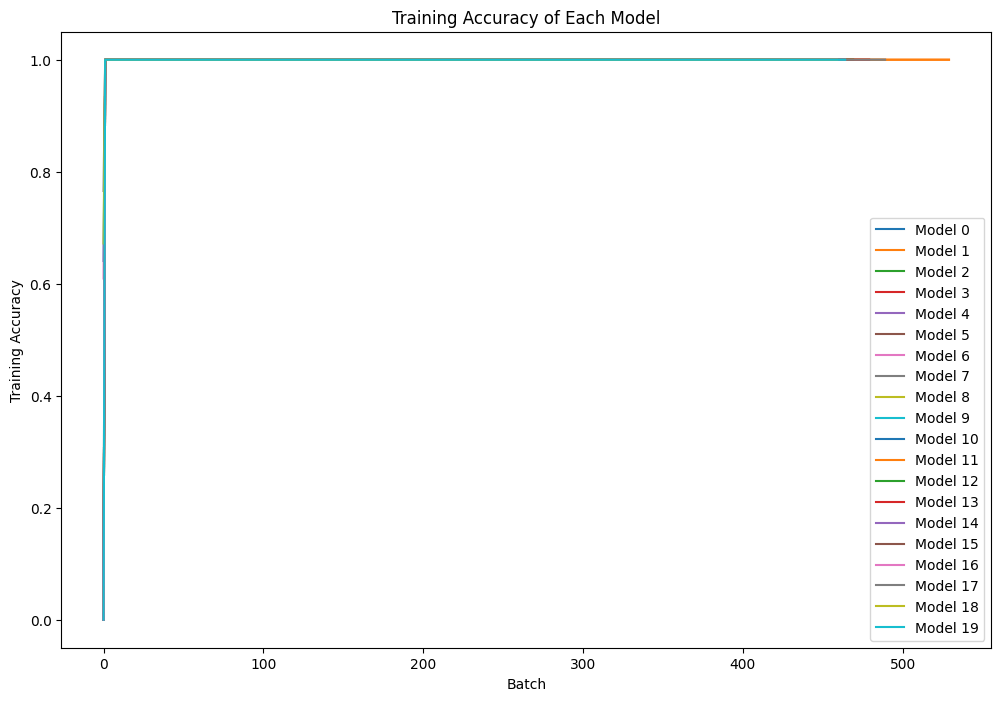

In [11]:
# plot the training accuracy of each model
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.plot(model_batch_accuracies[i])
plt.xlabel('Batch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy of Each Model')
plt.legend(['Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4',
            'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9',
            'Model 10', 'Model 11', 'Model 12', 'Model 13', 'Model 14',
            'Model 15', 'Model 16', 'Model 17', 'Model 18', 'Model 19'])
plt.show()

In [12]:
class Voter:
    def __init__(self, model, id):
        self.model = model
        self.id = id
        self.accuracy = []
        self.batch_accuracies = []
        self.CI = (0,0)
        
    def partial_fit(self, X, y):
        self.model.partial_fit(X, y)
    
    def predict(self, X):
        predictions = self.model.predict(X)
        

        return predictions

    def __str__(self):
        return "Voter " + str(self.id)
    
    def __repr__(self):
        return "Voter " + str(self.id)
    
class DelegationMechanism:
    def __init__(self):
        self.delegations = {}  # key: delegate_from (id), value: delegate_to (id)
        self.t = 0
        
    def delegate(self, from_id, to_id):
        #cycles are impossible with this mechanism, so we don't need to check for them
        self.delegations[from_id] = to_id

    def wilson_score_interval(self, point_wise_accuracies, confidence = 0.999):
        
        ups = sum(point_wise_accuracies)
        downs = len(point_wise_accuracies) - ups
        n = len(point_wise_accuracies)

        #use the specified confidence value to calculate the z-score
        z = stats.norm.ppf(1 - (1 - confidence) / 2)
        p = ups / n

        left = p + 1/(2*n)*z*z
        right = z*np.sqrt(p*(1-p)/n + z*z/(4*n*n))
        under = 1+1/n*z*z

        return ((left - right)/under, (left + right)/under)
    
    def ucb(self, voter):
        mean = np.mean(voter.accuracy)
        t = self.t
        c = 1

        bonus = c*np.sqrt(np.log(t)/len(voter.accuracy))

        # clip upper at 1
        upper = min(mean + bonus, 1)
        # clip lower at 0
        lower = max(mean - bonus, 0)

        return (lower, upper)

    def calculate_CI(self, voter):
        # point_wise_accuracies = voter.accuracy

        # # assume the point wise accuracies are a list of bernoulli random variables
        # # approximate using the Wilson score interval
        # return self.wilson_score_interval(point_wise_accuracies)
        return self.ucb(voter)

    def update_delegations(self, voters):    
        #first, we need to recalculate the CI for each voter
        for voter in voters:
            voter.CI = self.calculate_CI(voter)

        #now we need to do two things:
        #1. ensure all current delegations are still valid. If not, remove them
        #2. go through the full delegation process
        delegators_to_pop = []
        for delegator, delegee in self.delegations.items(): #check delegations and break invalid ones
            if delegator.CI[1] > delegee.CI[0]:
                delegators_to_pop.append(delegator)
        for delegator in delegators_to_pop:
            self.delegations.pop(delegator)
        
        for voter in voters: #go through the full delegation process
            possible_delegees = []
            gaps = []
            for other_voter in voters:
                # find all voters who are SIGNIFICANTLY better than the current voter. TODO: Could possibly apply a penalty for a high number of delegations
                if other_voter.id != voter.id and (other_voter.CI[0] > voter.CI[1]):
                    possible_delegees.append(other_voter)
                    gaps.append(other_voter.CI[0] - voter.CI[1])
            if len(possible_delegees) > 0:
                #probabilistically delegate based on the gaps
                # larger gaps are more likely to be chosen
                sum_gaps = sum(gaps)
                probabilities = [gap/sum_gaps for gap in gaps]
                delegee = np.random.choice(possible_delegees, p=probabilities)
                self.delegate(voter, delegee)

    def get_gurus(self, voters):
        #find all voters who have not delegated to anyone
        gurus = []
        for voter in voters:
            if voter not in self.delegations.keys():
                gurus.append(voter)
        return gurus
    

In [13]:
# We will now use all of these models as an ensemble to classify the test set
# We will use a majority vote to classify each image
# We will keep track of the accuracy of the ensemble on each batch of the dataset

# sort the test data set from 0 to 9
mnist_test.targets, indices = torch.sort(mnist_test.targets)
mnist_test.data = mnist_test.data[indices]

# randomly swap the positions of 10% of the images
# first get the indices of the images to swap
num_images = mnist_test.data.shape[0]
num_swaps = int(num_images * 0)
swap_indices = np.random.choice(num_images, num_swaps, replace=False)

# now swap the images
for i in swap_indices:
    # get the label of the image to swap
    label = mnist_test.targets[i].item()
    # find the index of the first image with a different label
    j = i
    while mnist_test.targets[j].item() == label:
        if j == num_images - 1:
            j=0
        else:
            j += 1
    # swap the images
    temp = mnist_test.data[i]
    mnist_test.data[i] = mnist_test.data[j]
    mnist_test.data[j] = temp

# print the number of images in each class
# print([(mnist_test.targets == i).sum() for i in range(10)])

# Create a data loader for the test set
test_loader = DataLoader(mnist_test, batch_size=15, shuffle=False)

In [19]:
voters = []

CIs_over_time = {0: [], 1: [], 2: [], 3: [], 4: [],
                5: [], 6: [], 7: [], 8: [], 9: [],
                10: [], 11: [], 12: [], 13: [], 14: [],
                15: [], 16: [], 17: [], 18: [], 19: []}

for i in range(len(models)):
    voters.append(Voter(models[i], i))

delegation_mechanism = DelegationMechanism()

liquid_dem_accs = []
full_ensembel_accs = []

# Warm start
# Take some small random samples from the test set and use them to warm start the delegation mechanism
# for i in range(1000):
#     # get a random sample from the test set
#     rand_idx = np.random.randint(0, len(mnist_test))
#     data, target = mnist_test[rand_idx]

#     # get all of the voters to to predict and update thier accuracies and CIs
#     for voter in voters:
#         predictions = voter.predict(data)
#         point_wise_accuracies = (predictions == target).float().tolist()
#         voter.accuracy.extend(point_wise_accuracies)
#         voter.CI = delegation_mechanism.calculate_CI(voter)
        

for batch_idx, (data, target) in enumerate(test_loader):
    data, target = data.to(device), target.to(device)

    
    
    gurus = delegation_mechanism.get_gurus(voters)
    # print(len(gurus))
    # print()
    for guru in gurus:
        # print(guru.CI)
        predictions = guru.predict(data)

        # print(predictions.shape)
        # print(predictions)
        # print(target.shape)

        point_wise_accuracies = (predictions == target).float().tolist()
        # guru.accuracy.extend(point_wise_accuracies)

        guru.batch_accuracies.append(sum(point_wise_accuracies)/len(point_wise_accuracies))

    # get all of the gurus to predict then take the majority vote
    liquid_dem_preds = []
    for guru in gurus:
        liquid_dem_preds.append(guru.predict(data))
    liquid_dem_preds = torch.stack(liquid_dem_preds).transpose(0, 1)
    #take the majority vote
    liquid_dem_preds = torch.mode(liquid_dem_preds, dim=1)[0]
    liquid_dem_accs.append((liquid_dem_preds == target).float().mean().item())

    # get every voter to predict and extend their accuracies
    # for voter in voters:
    #     predictions = voter.predict(data)
    #     point_wise_accuracies = (predictions == target).float().tolist()
    #     voter.accuracy.extend(point_wise_accuracies)

    # get all of the models to predict then take the majority vote
    full_ensemble_preds = []
    for model in models:
        full_ensemble_preds.append(model.predict(data))
    full_ensemble_preds = torch.stack(full_ensemble_preds).transpose(0, 1)
    #take the majority vote
    full_ensemble_preds = torch.mode(full_ensemble_preds, dim=1)[0]
    full_ensembel_accs.append((full_ensemble_preds == target).float().mean().item())

    # print(delegation_mechanism.delegations)

    delegation_mechanism.t += len(data)

    # add the CIs to the dictionary
    for voter in voters:
        CIs_over_time[voter.id].append(voter.CI)

    delegation_mechanism.update_delegations(voters)

    # print(delegation_mechanism.delegations)
    # print()

    # print()
    # print("Gurus: ", gurus)
    # print()
    # for guru in gurus:
        # print(guru.CI, end=" ")

    

/Users/carterblair/opt/anaconda3/envs/liquidDem/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/carterblair/opt/anaconda3/envs/liquidDem/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/kj/jqr6r99s1p945h2yplyzrglr0000gn/T/ipykernel_32681/3360767031.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  bonus = c*np.sqrt(np.log(t)/len(voter.accuracy))


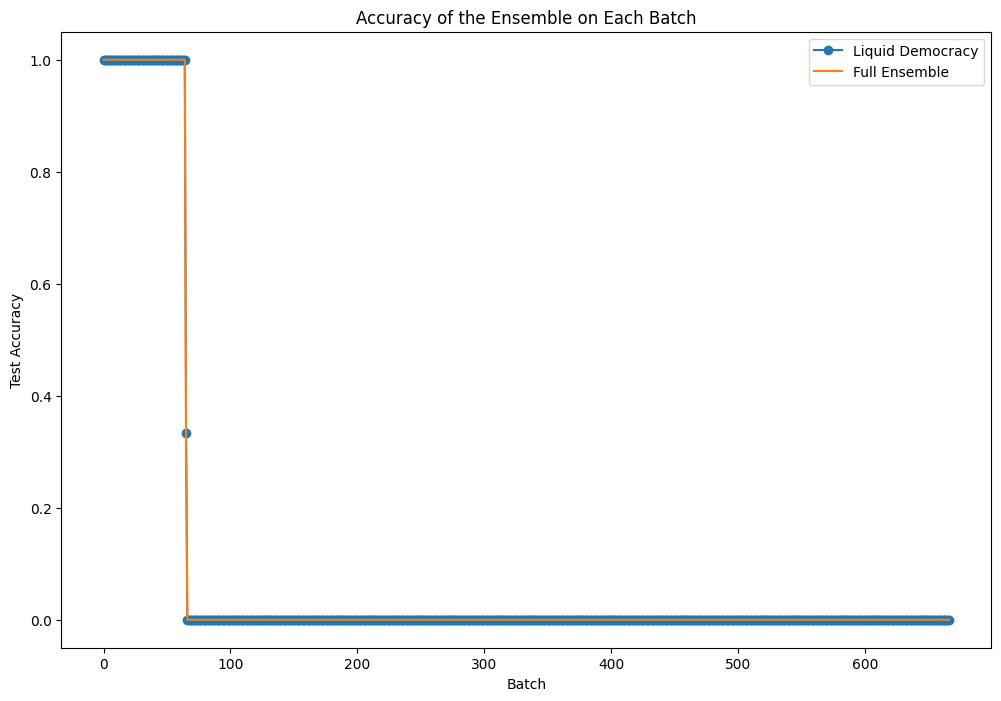

In [20]:
# plot the accuracy of the ensemble on each batch
plt.figure(figsize=(12, 8))
plt.plot(liquid_dem_accs, marker='o')
plt.plot(full_ensembel_accs)
plt.xlabel('Batch')
plt.ylabel('Test Accuracy')
plt.title('Accuracy of the Ensemble on Each Batch')
plt.legend(['Liquid Democracy', 'Full Ensemble'])
plt.show()

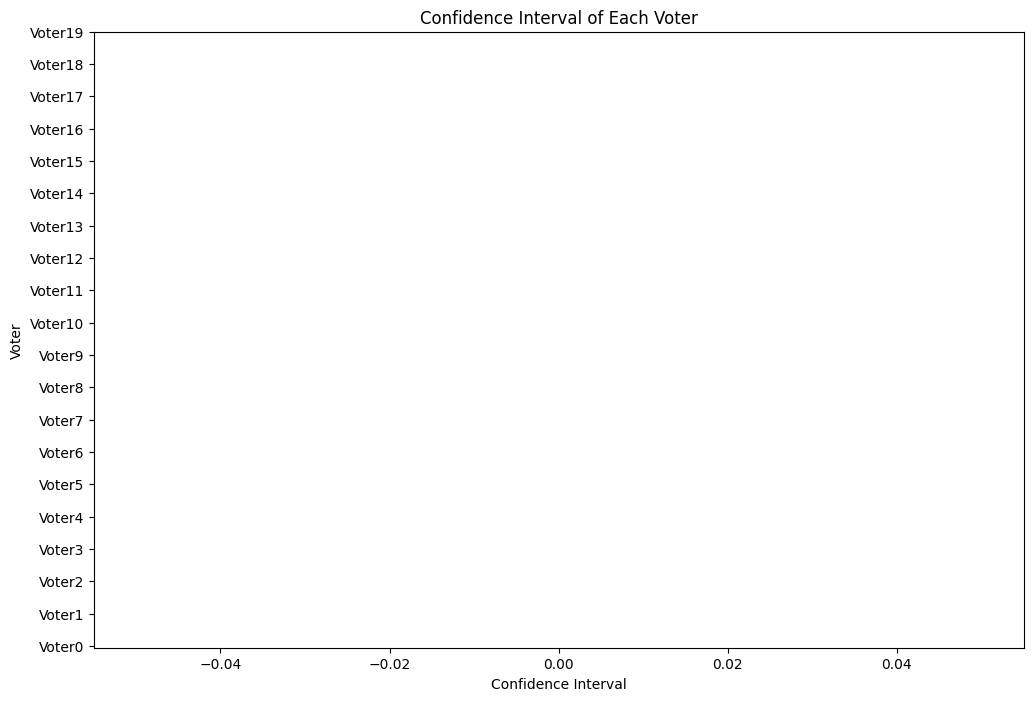

In [21]:
# plot the confidence intervals of each voter
plt.figure(figsize=(12, 8))

for voter in voters:
    plt.plot([voter.CI[0], voter.CI[1]], [voter.id, voter.id])

plt.xlabel('Confidence Interval')
plt.ylabel('Voter')
plt.title('Confidence Interval of Each Voter')
voter_names = ["Voter" + str(voter.id) for voter in voters]
plt.yticks(range(len(voters)), voter_names)
plt.show()


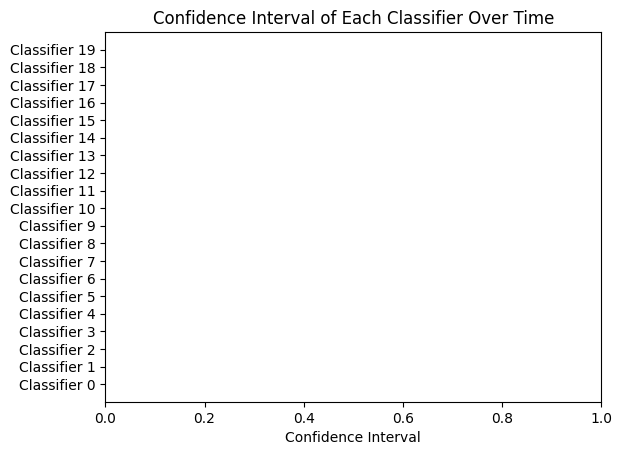

In [22]:
# Number of classifiers
num_classifiers = len(CIs_over_time)
# Number of time steps (assuming each classifier has the same number of time steps)
num_timesteps = len(CIs_over_time[0])

# Initialize figure and axis
fig, ax = plt.subplots()

# Set the labels and title
ax.set_xlabel('Confidence Interval')
ax.set_title('Confidence Interval of Each Classifier Over Time')

# Set the y-ticks to show classifier labels and adjust the plot limits
ax.set_yticks(range(num_classifiers))
ax.set_yticklabels([f'Classifier {i}' for i in range(num_classifiers)])
ax.set_xlim(0, 1)  # Set to the range of your confidence intervals
ax.set_ylim(-1, num_classifiers)  # Leave some space at the bottom

# Create a list to hold the line objects for each classifier
lines = [ax.plot([], [], 'o-', lw=2)[0] for _ in range(num_classifiers)]

# Function to initialize the animation
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Function to update the plot for each frame
def update(frame):
    for classifier, line in enumerate(lines):
        lower_ci, upper_ci = CIs_over_time[classifier][frame]
        line.set_data([lower_ci, upper_ci], [classifier, classifier])
    return lines

# Create the animation
anim = FuncAnimation(fig, update, frames=num_timesteps, init_func=init, blit=True, interval = 25)

In [23]:
anim.save('ucb_ci_animation.gif', writer='ffmpeg')

MovieWriter ffmpeg unavailable; using Pillow instead.


- average accuracy over the last n data points (sliding window approach)
- whether the confidence interval is dependent on the number of data points
- Try auditing the classifiers
- The voters that were delegating need to be better informed
- Train classifiers on different sits (i.e. 1 and 50% of 3 etc.)
- Only delegate from a gurus once youre somewhat confident theyre worse than you
- Only change delegation if the person youre delegating to is worse than you

1. sticky delegations (longer chains of delegation) (BEN)
2. Auditing the classifiers (Later)
3. Using a sliding window for the confidence interval calculation (BEN)
4. Training classifiers that are experts on one digit (or a couple) and decent at a few others (CARTER)

In [237]:
wils = DelegationMechanism().wilson_score_interval([1,1,0,0])
print(wils)

(0.07273187762031137, 0.9272681223796886)


In [238]:
wils2 = DelegationMechanism().wilson_score_interval([1,1,1,1,0,0,0,0])
print(wils2)

(0.12082618665530338, 0.8791738133446965)
